# Lab 4



Importing Libraries


In [4]:
%matplotlib inline
import os
import time
import math
import pylab 
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from math import sqrt
import scipy.stats as stats

import sklearn
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import  LassoLarsIC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 500)

# Pre Processing the Dataset

In [2]:
if 'preprocessed_data.csv' in os.listdir():
    df = pd.read_csv('preprocessed_data.csv')
else:
    df = raw_data.copy()
    df['trans_date_trans_time'] = raw_data['trans_date_trans_time'].apply(lambda x: pd.to_datetime(x))
    df['minute'] = df['trans_date_trans_time'].apply(lambda x: x.hour*60+x.minute)
    df['year_of_birth'] =  df['dob'].apply(lambda x: pd.to_datetime(x).year)
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,minute,year_of_birth
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,1988
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,1978
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,1962
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,1,1967
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,3,1986


In [10]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,minute,year_of_birth
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,1988
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,1978
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,1962
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,1,1967
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,3,1986


# Variables 

**Predictors**  (3-6)
1. City population
2. Lattitude
3. Longitude



**Targets** (2-3)
1. Amount
2. Year of birth

# Step 1: Substantiation of chosen sampling. 
Choose about 3-6 variables from your dataset (2-3 – target variables, the rest - predictors).

#### Since the dataset is huge we will choose only transactions from 23.03.2020 to 27.03.2020 to see differences

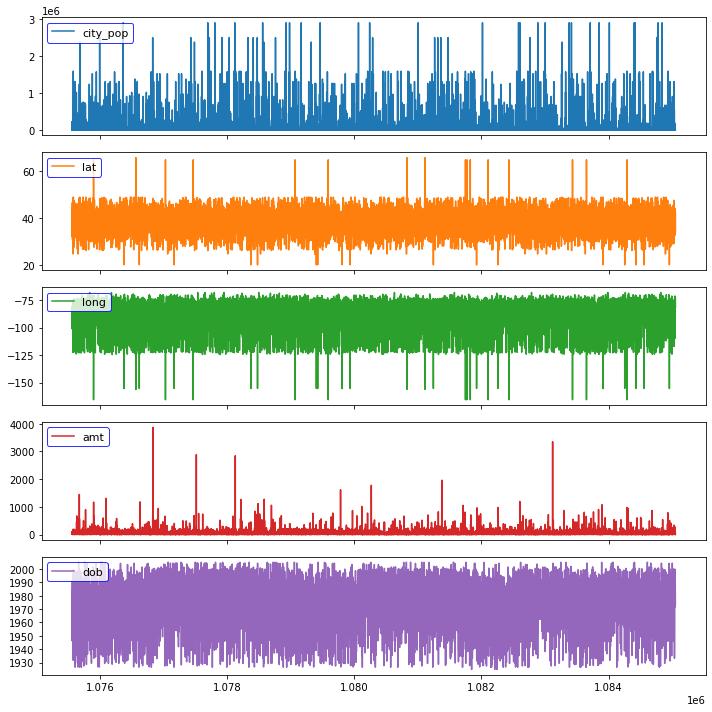

In [13]:
# Plot the choosen target variables.

cols = ['city_pop', 'lat', 'long', 'amt', 'dob']
cols_x = ['city_pop', 'lat', 'long']
cols_y = ['amt', 'dob']

subsamples = df[(df['trans_date_trans_time']>=pd.to_datetime('23.03.2020')) & (df['trans_date_trans_time']<=pd.to_datetime('27.03.2020'))][cols]
# subsamples = df[(df['trans_date_trans_time']>=pd.to_datetime('23.03.2020')) & (df['trans_date_trans_time']<=pd.to_datetime('27.03.2020')) & (df['state']=='TX')][cols]

fig, axes = plt.subplots(5,1, figsize=(10,10), sharex=True)
subsamples[cols].plot(subplots=True, ax=axes)

# for subplots we must add features by subplot axis
for ax, col in zip(axes, cols):
    
#     ax.set_xlabel('Monthly')
    
    # add cool legend
    ax.legend(loc='upper left', fontsize=11, frameon=True).get_frame().set_edgecolor('blue')  

# now to use tight layout
plt.tight_layout()
plt.savefig('plots/raw_initial_plots.png')

In [19]:
df['dob'].astype(int).mean()

1.1852297501718803e+17

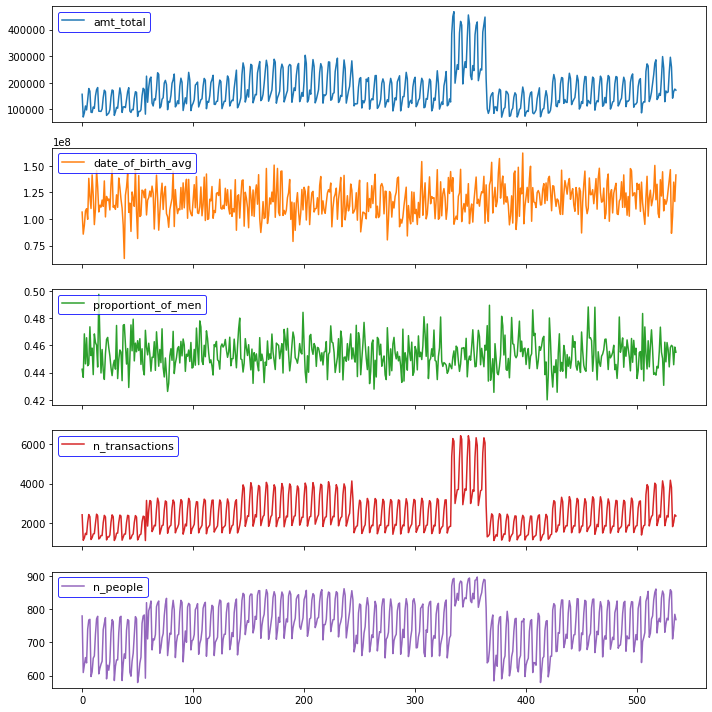

In [50]:
# Same data, but aggregated in days
df['day'] = df['trans_date_trans_time'].dt.floor('d')
df['gender_n'] = df['gender'].apply(lambda x: 1 if x=='M' else 0)
df['date_of_birth_numeric'] = df['dob'].astype(int) / 10**9

df_daily = df.groupby('day', as_index=False).agg({"amt": "sum", "date_of_birth_numeric": "mean", 'gender_n': "mean", "zip": "count", "cc_num": "nunique"})
df_daily.rename(columns={'amt': 'amt_total', 'date_of_birth_numeric':'date_of_birth_avg', 'gender_n': 'proportiont_of_men', 'zip': 'n_transactions', 'cc_num': 'n_people'}, inplace=True)

df_daily = df_daily[:-1]

cols_daily = df_daily.columns

fig, axes = plt.subplots(5,1, figsize=(10,10), sharex=True)
df_daily[cols_daily[1:]].plot(subplots=True, ax=axes)

# for subplots we must add features by subplot axis
for ax, col in zip(axes, cols_daily[1:]):
    ax.legend(loc='upper left', fontsize=11, frameon=True).get_frame().set_edgecolor('blue')  
    
# now to use tight layout
plt.tight_layout()
plt.savefig('plots/raw_daily_plots.png')

In [51]:
df_daily.to_csv('daily_data.csv')

# Step 2: Stationary analysis.
Analyze stationarity of a process (for mathematical expectation and variance) for all chosen variables. Make them more stationary if needed.

In [52]:
#Stationary analysis indiviually for each variable is done here 

%pylab inline
import statsmodels.tsa.api as smt

for col in cols:
    result = smt.stattools.adfuller(subsamples[col])
    print('Augmented Dickey-Fuller test for {}: \n\tStatistic value = {:.4f}\n\tp-value = {:.4f}'.format(col, result[0], result[1]))

Populating the interactive namespace from numpy and matplotlib
Augmented Dickey-Fuller test for city_pop: 
	Statistic value = -98.9655
	p-value = 0.0000
Augmented Dickey-Fuller test for lat: 
	Statistic value = -97.2344
	p-value = 0.0000
Augmented Dickey-Fuller test for long: 
	Statistic value = -98.0626
	p-value = 0.0000
Augmented Dickey-Fuller test for amt: 
	Statistic value = -97.8900
	p-value = 0.0000
Augmented Dickey-Fuller test for dob: 
	Statistic value = -6.7887
	p-value = 0.0000


In [54]:
#Stationary analysis indiviually for each variable is done here 

%pylab inline
import statsmodels.tsa.api as smt

for col in cols_daily[1:]:
    result = smt.stattools.adfuller(df_daily[col])
    print('Augmented Dickey-Fuller test for {}: \n\tStatistic value = {:.5f}\n\tp-value = {:.5f}'.format(col, result[0], result[1]))

Populating the interactive namespace from numpy and matplotlib
Augmented Dickey-Fuller test for amt_total: 
	Statistic value = -3.55437
	p-value = 0.00670
Augmented Dickey-Fuller test for date_of_birth_avg: 
	Statistic value = -4.34387
	p-value = 0.00037
Augmented Dickey-Fuller test for proportiont_of_men: 
	Statistic value = -5.54968
	p-value = 0.00000
Augmented Dickey-Fuller test for n_transactions: 
	Statistic value = -3.58397
	p-value = 0.00607
Augmented Dickey-Fuller test for n_people: 
	Statistic value = -3.30490
	p-value = 0.01466


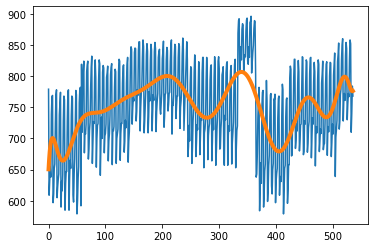

In [59]:
# It didn't make any sence, but still looks cool. 
def trendline(data, order=9):
    #polynomial trend
    trend = np.polyfit(data.index.values, list(data), order)
    return np.poly1d(trend)(data.index.values)

trend = trendline(df_daily['n_people'], 15)
plt.plot(df_daily['n_people'])
plt.plot(trend, linewidth=4)
plt.show()

#### We will use daily aggredated data further

# Step 3: Covariance or correlation function analysis.
Analyze covariance or correlation function for chosen target variables and mutual correlation functions among predictors and targets.

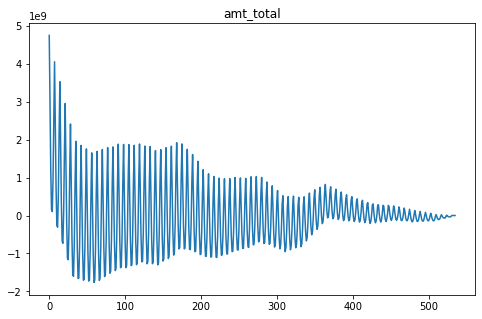

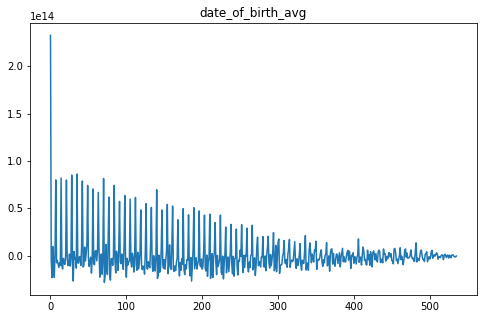

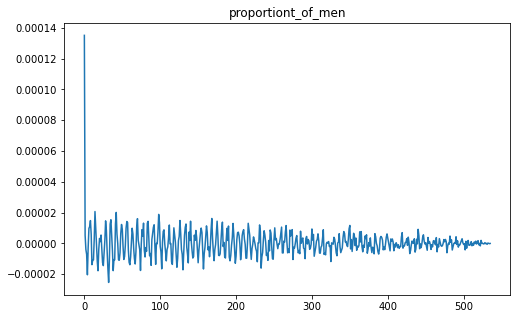

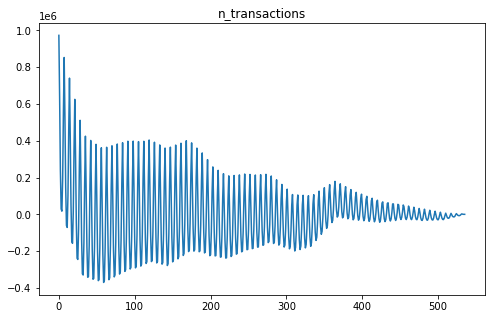

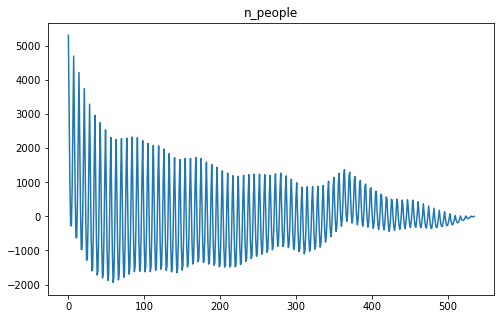

In [60]:
from statsmodels.tsa import stattools

#autocovariance without window

for col in cols_daily[1:]:
    plt.figure(figsize=(8, 5))
    plt.plot(stattools.acovf(df_daily[col],fft=False), label=col)
    plt.title(col)
    plt.show()

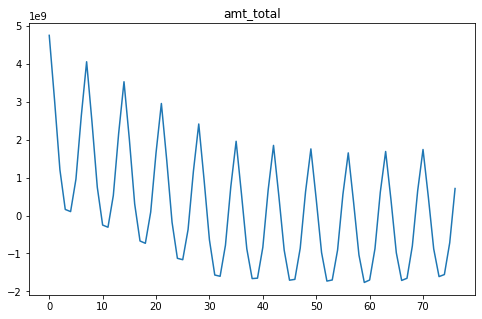

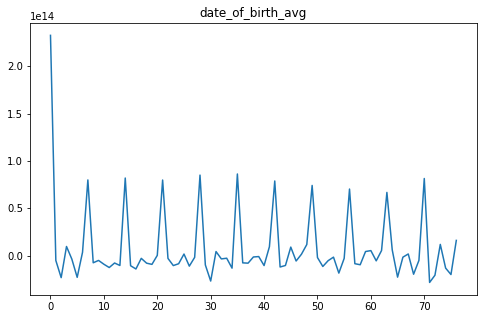

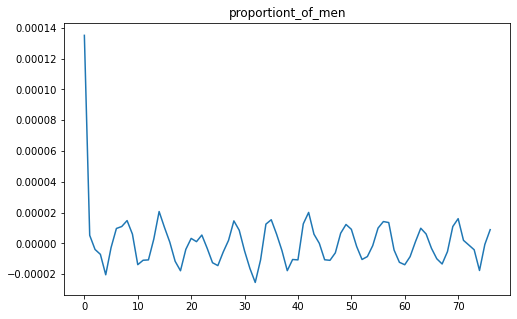

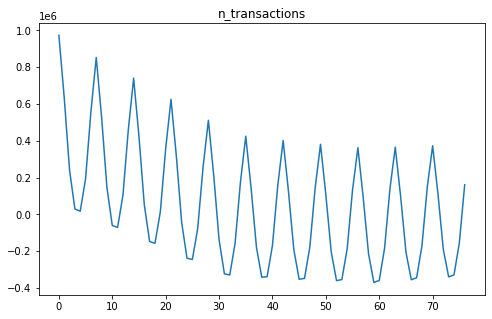

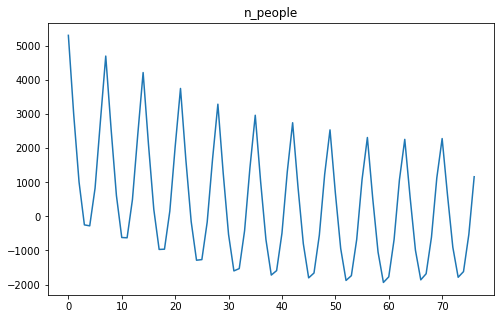

In [61]:
#autocovariance upto N values

N=df_daily.shape[0]//7

for col in cols_daily[1:]:
    plt.figure(figsize=(8, 5))
    plt.plot(stattools.acovf(df_daily[col], nlag=N,fft=False), label=col)
    plt.title(col)
    plt.show()

Text(0.5, 0, 'Sample')

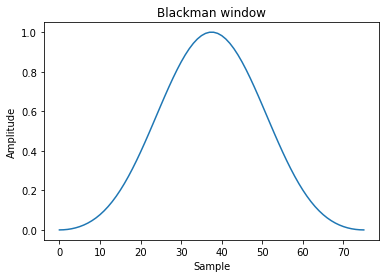

In [62]:
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np


window_size = df_daily.shape[0]//7
blackman = signal.blackman(M=window_size)
bartlett = signal.hanning(M=window_size)

plt.plot(blackman)
plt.title("Blackman window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

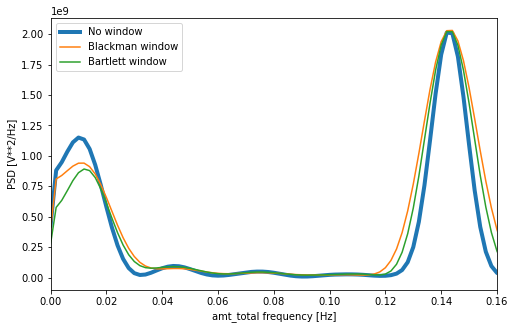

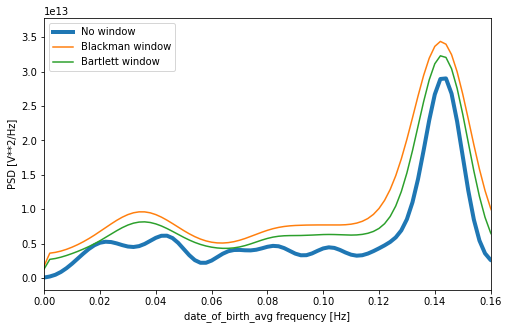

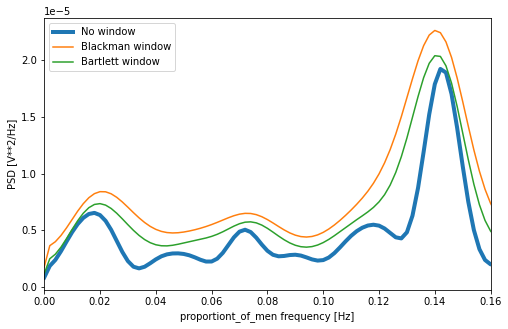

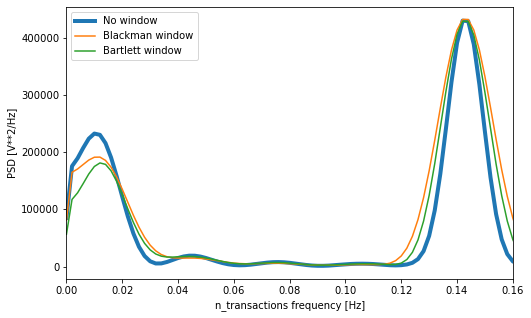

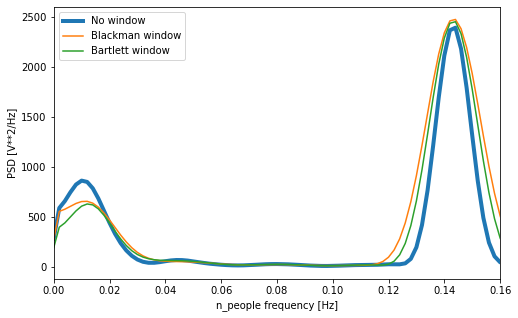

In [63]:
for col in cols_daily[1:]: # Everything but datetime
    nftt = 500
    plt.figure(figsize=(8, 5))
    f, Pxx_den = signal.welch(df_daily[col], fs=1, scaling='spectrum', nfft = nftt, nperseg=100)
    f_window, Pxx_den_window = signal.welch(df_daily[col], fs=1, window = blackman, nfft = nftt, scaling='spectrum')
    f_window_bart, Pxx_den_window_bart = signal.welch(df_daily[col], fs=1, window = bartlett, nfft = nftt, scaling='spectrum')
    plt.plot(f, Pxx_den, linewidth=4, label='No window')
    plt.plot(f_window, Pxx_den_window, label='Blackman window')
    plt.plot(f_window_bart, Pxx_den_window_bart, label='Bartlett window')

    plt.legend()
    plt.xlabel(col+' frequency [Hz]')
    plt.ylabel('PSD [V**2/Hz]')
    plt.xlim((0,0.16))
    plt.show()

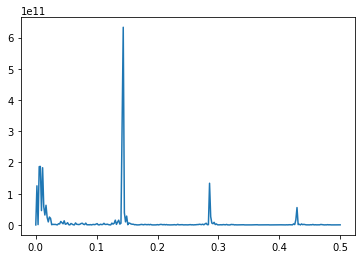

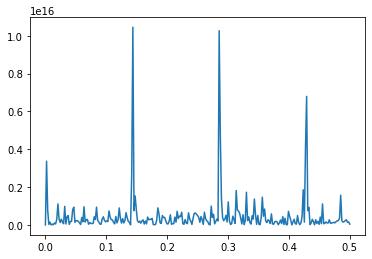

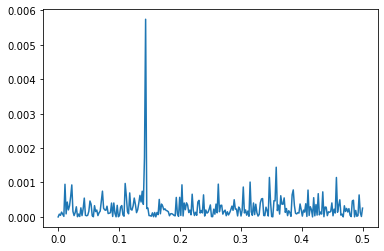

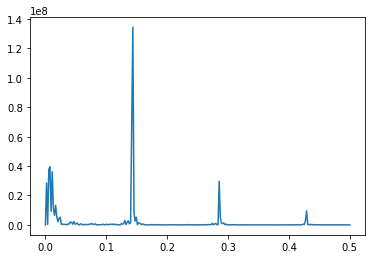

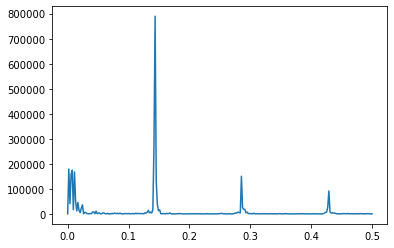

In [64]:
for col in cols_daily[1:]:
    f, p = signal.periodogram(x=df_daily[col],fs=1,window=None)
    plt.plot(f,p)
    plt.show()

# Step 4: Noise filtration.
Filter high frequencies (noise) with chosen 2 filters for target variables.


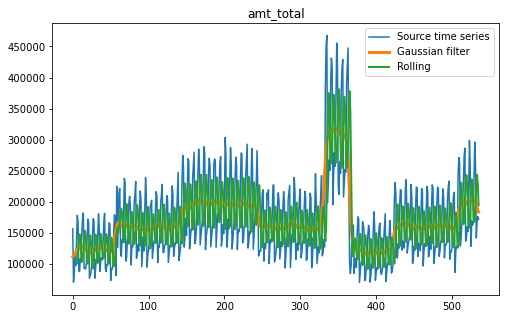

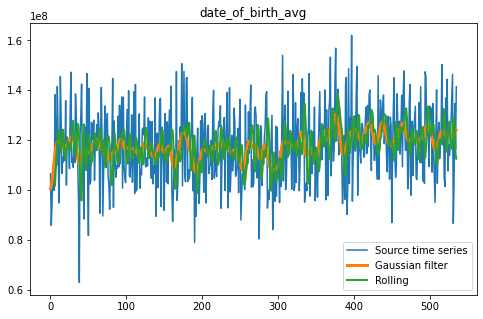

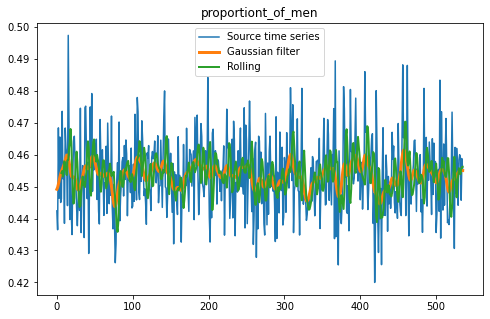

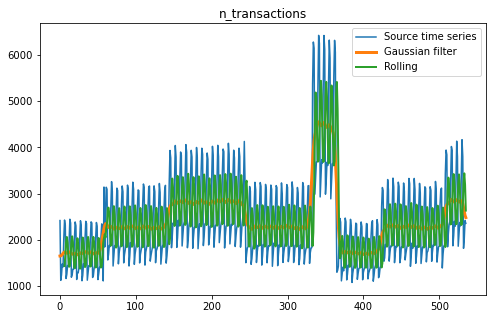

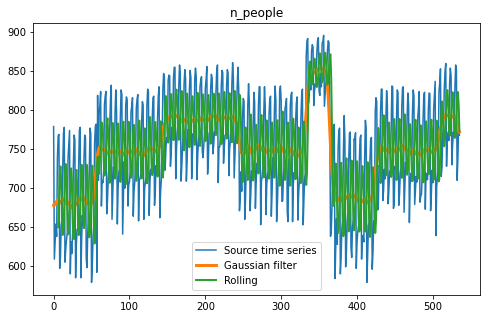

In [68]:
from scipy.ndimage import gaussian_filter

df_daily_gauss = df_daily.copy()
df_daily_rolling = df_daily.copy()

for col in cols_daily[1:]:
    df_daily_gauss[col] = gaussian_filter(df_daily[col], sigma=3)
    df_daily_rolling[col] = df_daily[col].rolling(7, win_type='bartlett').mean()
    plt.figure(figsize=(8, 5))
    plt.plot(df_daily[col], label='Source time series')
    plt.plot(df_daily_gauss[col], linewidth=3, label='Gaussian filter')
    plt.plot(df_daily_rolling[col], linewidth=2, label='Rolling')
    plt.title(col)
    plt.legend()
    plt.show()

# Step 5: Estimation of spectral density function 
Estimate spectral density function for with and without filtering.

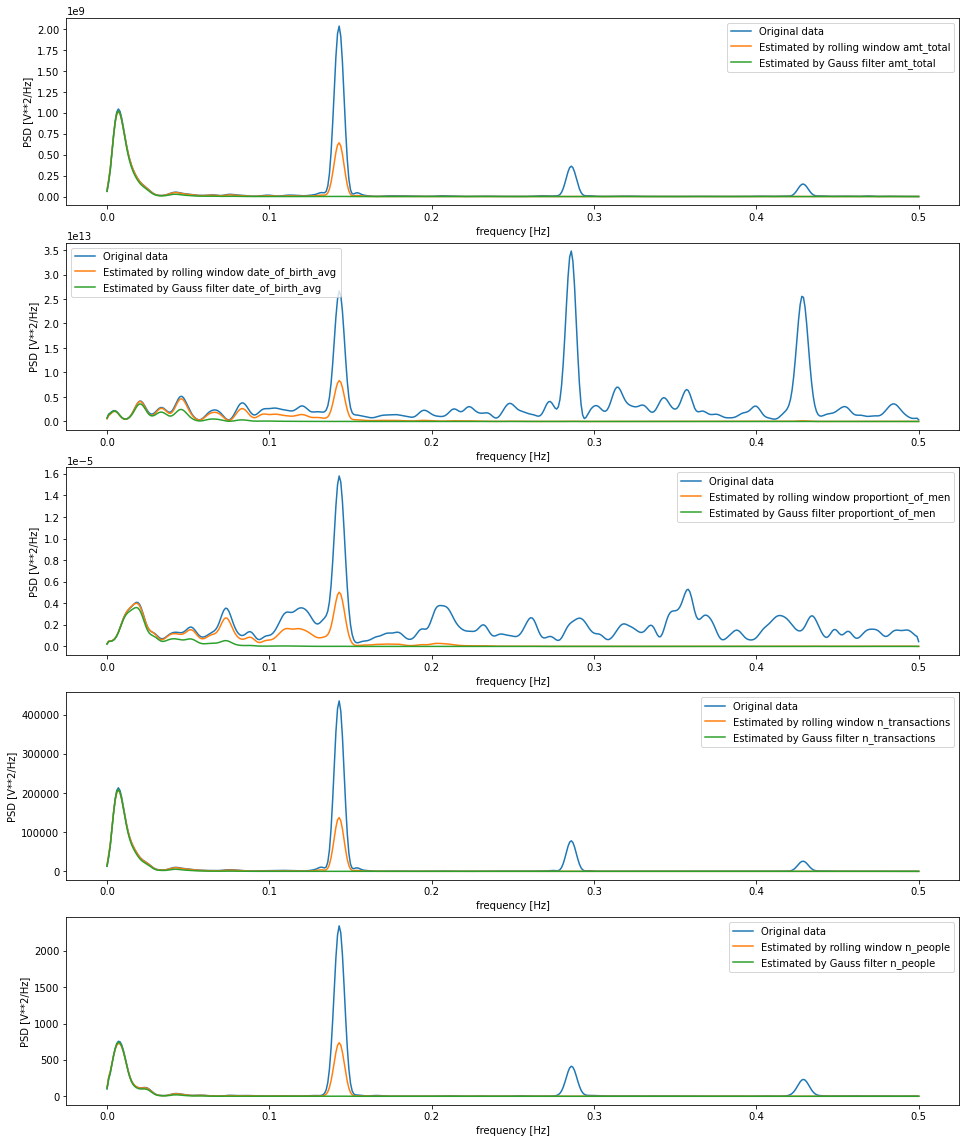

In [85]:
import warnings
warnings.filterwarnings("ignore")
    
nperseg = 200
fig, axs = plt.subplots(len(cols_daily[1:]), 1, figsize=(16, 20))
for i, col in enumerate(cols_daily[1:]):
    f, Pxx_den = signal.welch(df_daily[col], fs=1, scaling='spectrum', nfft = 1000, nperseg=nperseg)
    f_smooth, Pxx_den_smooth = signal.welch(df_daily_rolling[col].dropna(), fs=1, scaling='spectrum', nfft = 1000, nperseg=nperseg)
    f_gauss, Pxx_den_gauss = signal.welch(df_daily_gauss[col], fs=1, scaling='spectrum', nfft = 1000, nperseg=nperseg)
    axs[i].plot(f, Pxx_den)
    axs[i].plot(f_smooth, Pxx_den_smooth)
    axs[i].plot(f_gauss, Pxx_den_gauss)
    axs[i].set_xlabel('frequency [Hz]')
    axs[i].set_ylabel('PSD [V**2/Hz]')
    axs[i].legend(['Original data', 'Estimated by rolling window '+col, 'Estimated by Gauss filter '+col])
plt.savefig('plots/PSD.png')

# Step 6: Auto-regression model. 
Built auto-regression model filtered and non-filtered data. To analyze residual error and to define appropriate order of model.

In [86]:
df_daily.set_index('day', inplace = True)

In [87]:
df_daily.head(3)

,amt_total,date_of_birth_avg,proportiont_of_men,n_transactions,n_people
day,,,,,
2019-01-01,156487.09,1.064996e+08,0.442419,2414,779
2019-01-02,70723.58,8.579188e+07,0.436494,1118,609
2019-01-03,86516.49,9.416831e+07,0.468447,1236,631


In [113]:
data_for_regression = df_daily[['amt_total', 'n_transactions']]\
                    .rename(columns={'amt_total': 'amt_total_original', 'n_transactions': 'n_transactions_original'})
data_for_regression['amt_total_gauss'] = df_daily_gauss.set_index('day')['amt_total']
data_for_regression['n_transactions_gauss'] = df_daily_gauss.set_index('day')['n_transactions']
data_for_regression['amt_total_rolling'] = df_daily_rolling.set_index('day')['amt_total']
data_for_regression['n_transactions_rolling'] = df_daily_rolling.set_index('day')['n_transactions']

data_for_regression.dropna(inplace=True)
data_for_regression.head()

,amt_total_original,n_transactions_original,amt_total_gauss,n_transactions_gauss,amt_total_rolling,n_transactions_rolling
day,,,,,,
2019-01-07,178233.18,2425,124130.860071,1733,101319.355556,1428.777778
2019-01-08,168061.93,2314,124699.759486,1728,117082.584444,1654.888889
2019-01-09,88906.06,1158,124563.654931,1716,137711.730000,1949.222222
2019-01-10,87716.01,1249,124541.391753,1706,147650.890000,2058.666667
2019-01-11,108301.60,1439,125233.186444,1707,140221.832222,1931.777778


<Figure size 1080x216 with 0 Axes>

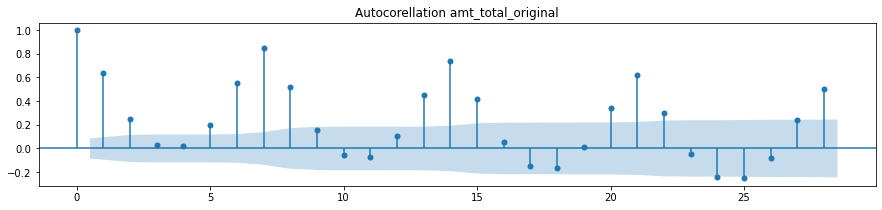

<Figure size 1080x216 with 0 Axes>

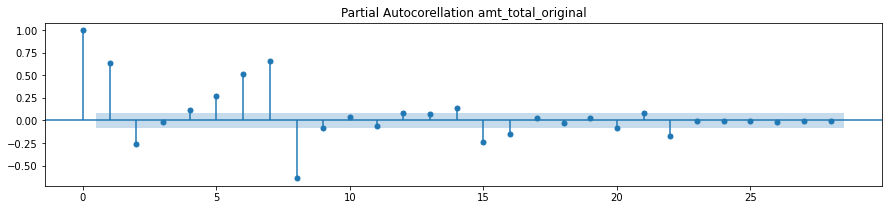

<Figure size 1080x216 with 0 Axes>

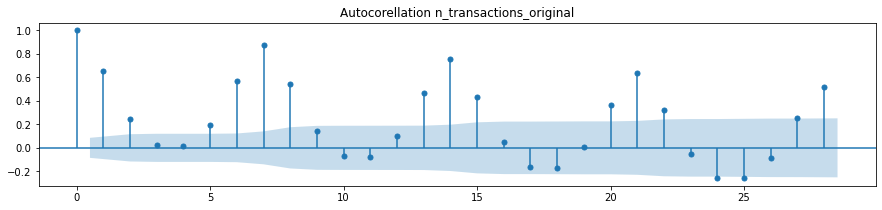

<Figure size 1080x216 with 0 Axes>

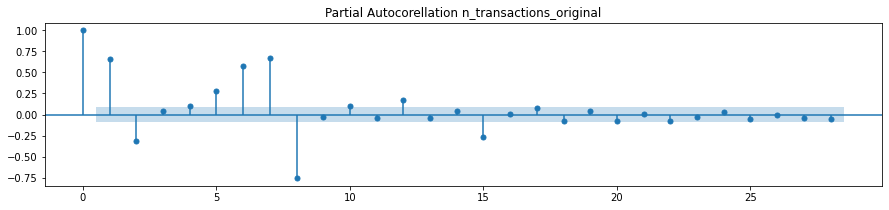

<Figure size 1080x216 with 0 Axes>

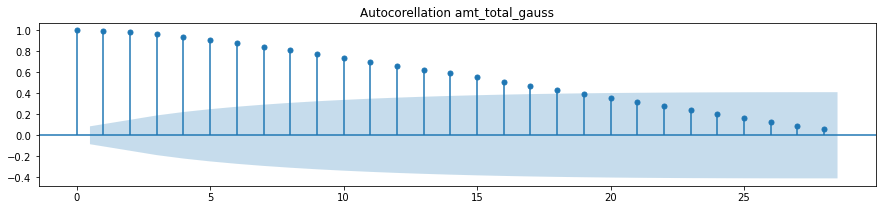

<Figure size 1080x216 with 0 Axes>

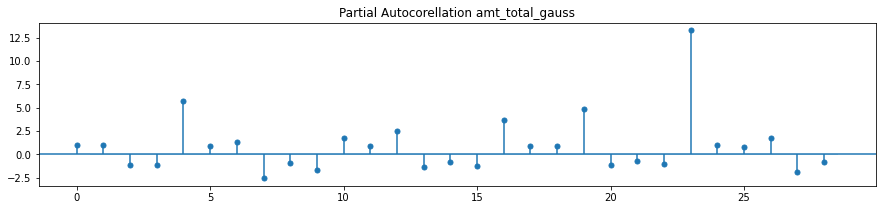

<Figure size 1080x216 with 0 Axes>

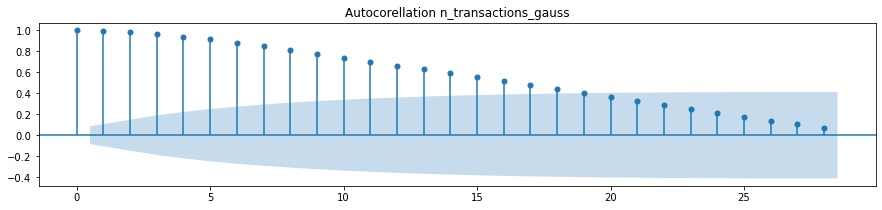

<Figure size 1080x216 with 0 Axes>

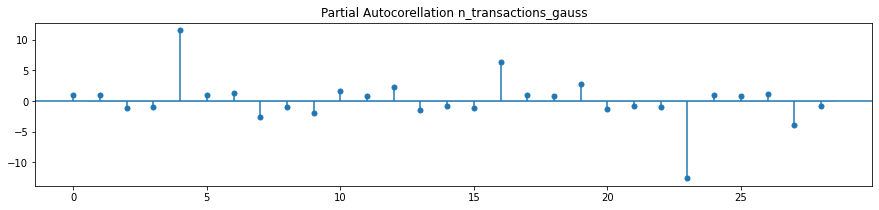

<Figure size 1080x216 with 0 Axes>

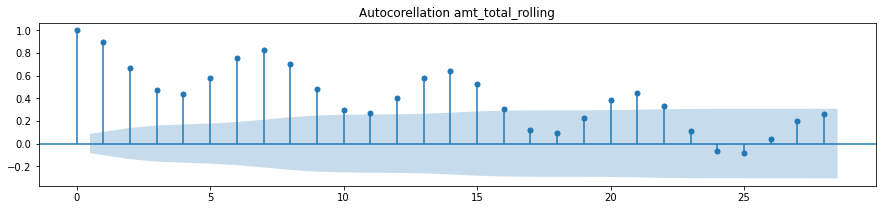

<Figure size 1080x216 with 0 Axes>

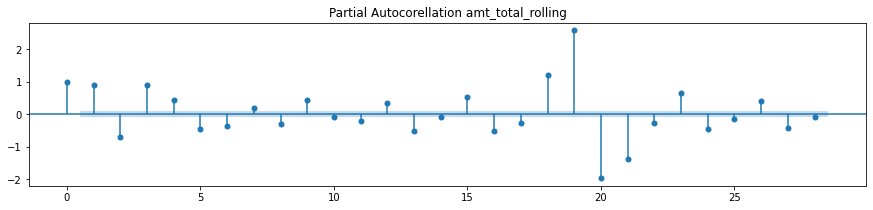

<Figure size 1080x216 with 0 Axes>

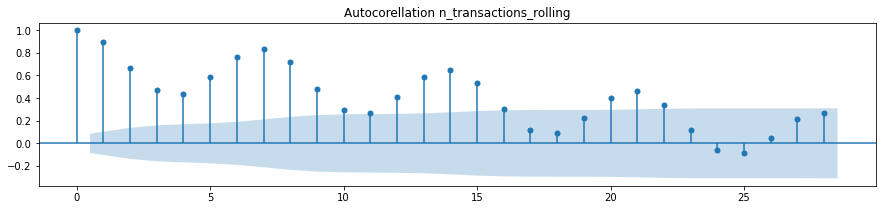

<Figure size 1080x216 with 0 Axes>

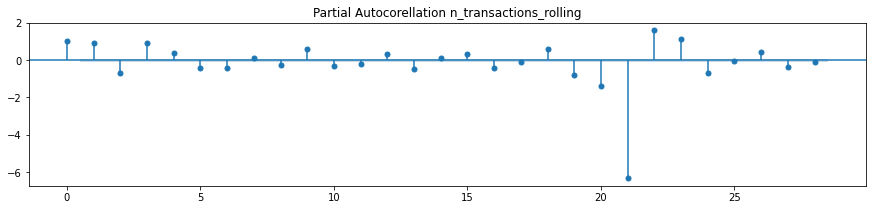

In [89]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

for col in data_for_regression.columns:
    plt.figure(figsize(15, 3))
    plot_acf(data_for_regression[col].values.squeeze())
    plt.title('Autocorellation '+col)
    pylab.show()
    plt.figure(figsize(15, 3))
    plot_pacf(data_for_regression[col].values.squeeze())
    plt.title('Partial Autocorellation '+col)
    pylab.show()

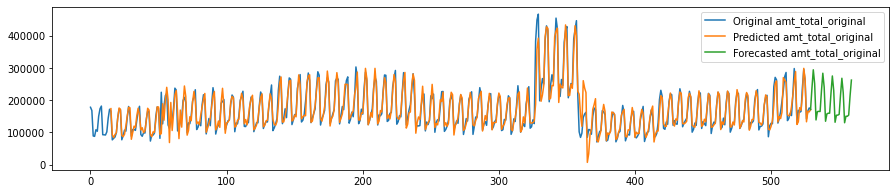

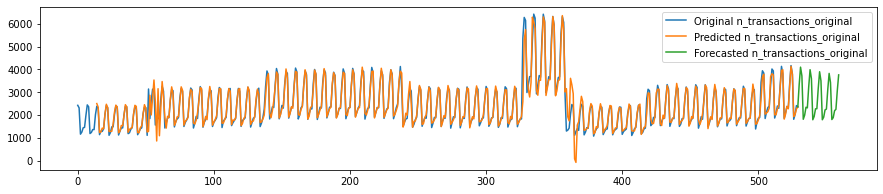

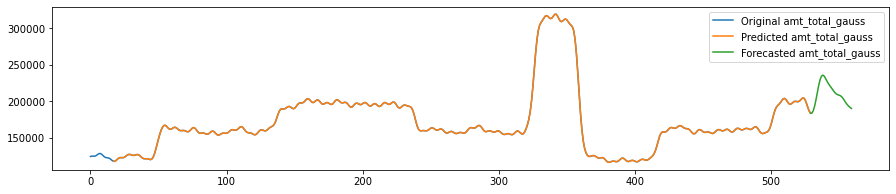

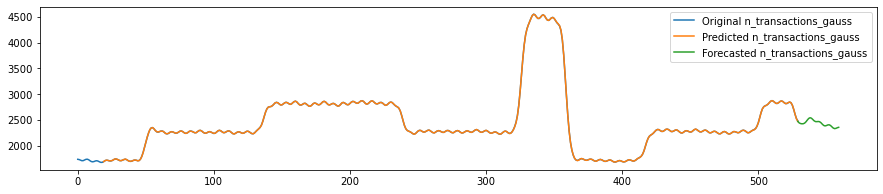

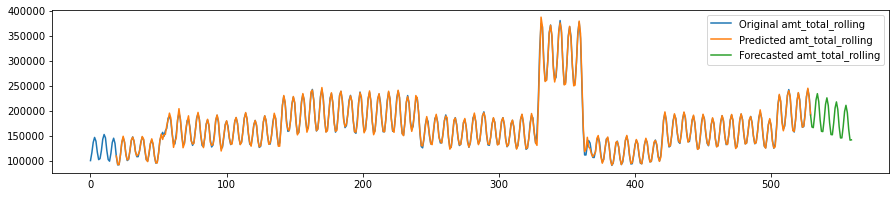

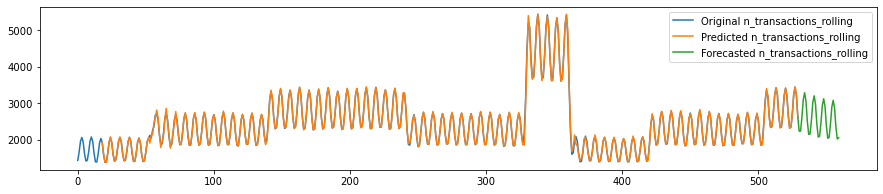

In [90]:
from statsmodels.tsa.ar_model import AutoReg
models = dict()
pred = dict()
fcst = dict()
n_lags = dict()
for col in data_for_regression.columns:
    buf = smt.stattools.adfuller(data_for_regression[col], autolag = 'AIC')
    n_lags[col] = buf[2]
    data = data_for_regression.reset_index()[col]
    models[col] = AutoReg(data, lags=n_lags[col]).fit()
    pred[col] = dict()
    start = 0
    end = data.shape[0]-1
    forecasting_limit = end+30 # prediction for a next month
    pred[col] = models[col].predict(start=start, end=end, dynamic=False)
    fcst[col]=models[col].predict(start=end, end=forecasting_limit, dynamic=True)
    
    plt.figure(figsize(15, 3))
    data.plot(label = 'Original '+col)
    pred[col].plot(label='Predicted '+col)
    fcst[col].plot(label='Forecasted '+col)
    plt.legend()
    plt.show()

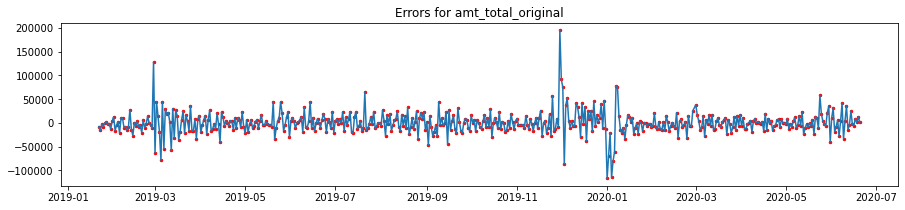

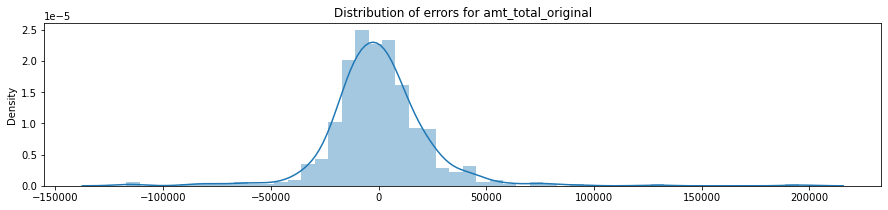

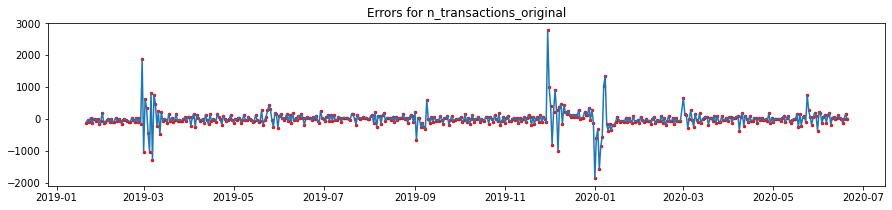

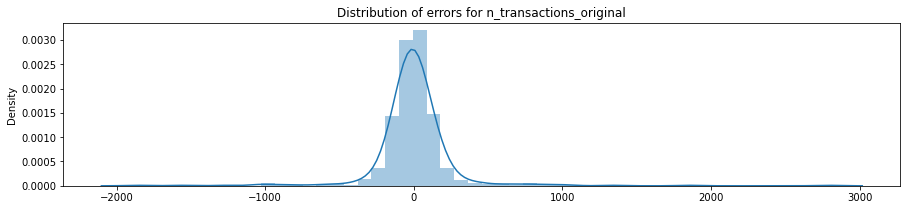

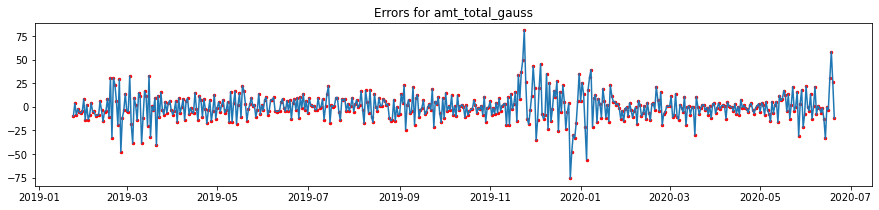

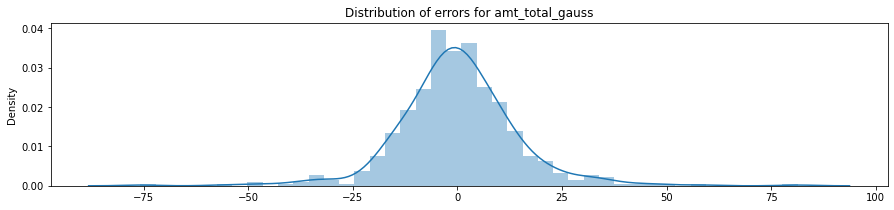

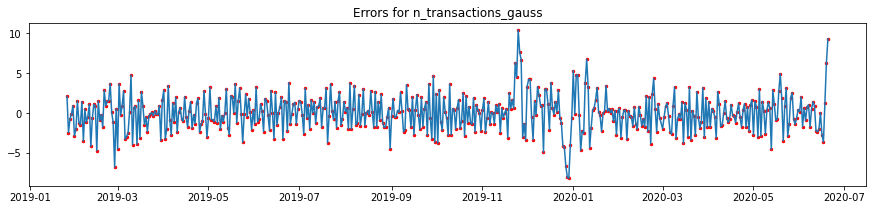

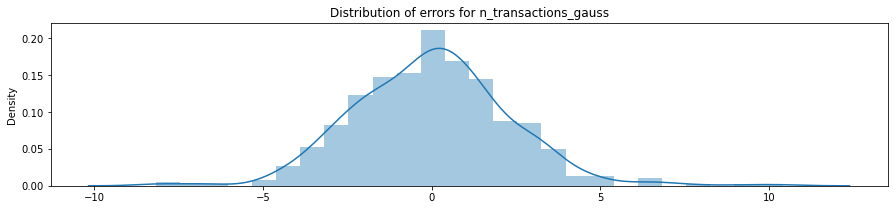

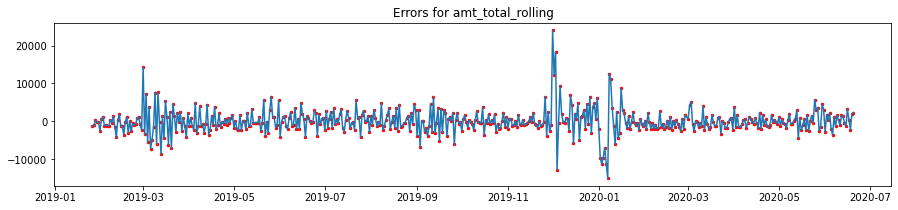

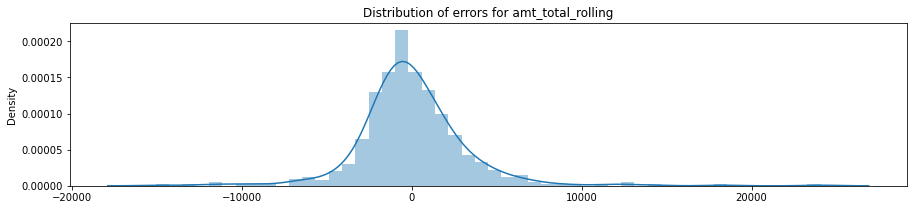

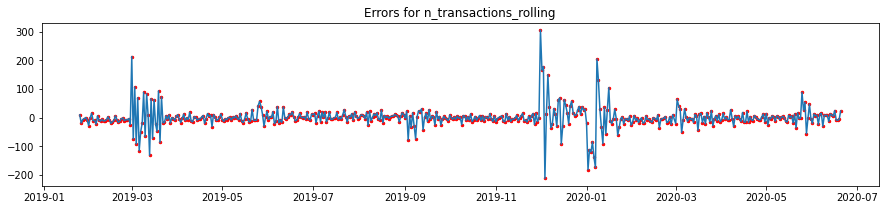

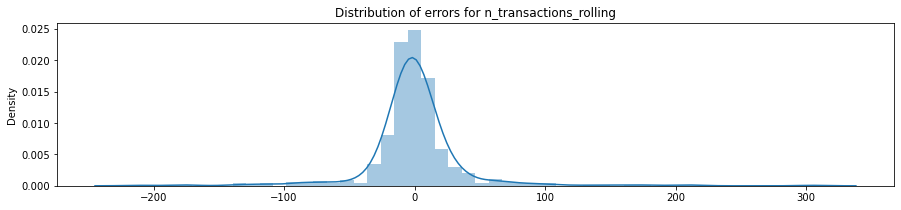

In [91]:
# data_for_regression[col]
errors = dict()
for col in data_for_regression.columns:
    errors[col] = data_for_regression[col][n_lags[col]:].values-pred[col][n_lags[col]:].values
    plt.figure(figsize(15, 3))
    plt.plot(data_for_regression.index[n_lags[col]:], errors[col]) # our mistakes
    plt.scatter(data_for_regression.index[n_lags[col]:], errors[col], s=6, c='red')
    plt.title('Errors for '+col)
    plt.show()
    
    plt.figure(figsize(15, 3))
    sns.distplot(errors[col])
    plt.title('Distribution of errors for '+col)
    plt.show()

In [92]:
r2 = []
mae = []
mse = []
for col in data_for_regression.columns:
    r2.append(r2_score(data_for_regression[col][n_lags[col]:].values, pred[col][n_lags[col]:].values))
    mae.append(mean_absolute_error(data_for_regression[col][n_lags[col]:].values, pred[col][n_lags[col]:].values))
    mse.append(mean_squared_error(data_for_regression[col][n_lags[col]:].values, pred[col][n_lags[col]:].values))
metrics_table=pd.DataFrame({'Model': data_for_regression.columns, 'R2 score': r2, 'MAE': mae, 'MSE': mse})

In [93]:
metrics_table

,Model,R2 score,MAE,MSE
0,amt_total_original,0.881434,15521.890918,5.686868e+08
1,n_transactions_original,0.921015,137.566944,7.742423e+04
2,amt_total_gauss,1.000000,10.067968,2.061865e+02
3,n_transactions_gauss,0.999986,1.760310,5.283424e+00
4,amt_total_rolling,0.995922,2158.535113,1.079246e+07
5,n_transactions_rolling,0.997316,20.144494,1.461881e+03


# Step 7: Model in a form of linear dynamical system. 
Build model in a form of linear dynamical system, using chosen predictors. To analyze residual error and to define appropriate order of model.

#### We will use Vector Autoregressions from `statsmodels.tsa.api`

In [94]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.base.datetools import dates_from_str


In [95]:
df_daily.corr()

,amt_total,date_of_birth_avg,proportiont_of_men,n_transactions,n_people
amt_total,1.000000,0.125548,-0.231943,0.990938,0.897358
date_of_birth_avg,0.125548,1.000000,-0.066185,0.135085,0.120331
proportiont_of_men,-0.231943,-0.066185,1.000000,-0.231410,-0.244851
n_transactions,0.990938,0.135085,-0.231410,1.000000,0.906527
n_people,0.897358,0.120331,-0.244851,0.906527,1.000000


In [96]:
# df_daily
data_to_predict=df_daily
model = VAR(data_to_predict)

In [97]:
forecast_days = 30
results = model.fit(forecast_days)
results.summary() # Report needs only summary of target variables

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 04, Dec, 2021
Time:                     17:49:15
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    66.1837
Nobs:                     506.000    HQIC:                   62.3507
Log likelihood:          -17983.9    FPE:                1.10933e+26
AIC:                      59.8773    Det(Omega_mle):     3.00598e+25
--------------------------------------------------------------------
Results for equation amt_total
                            coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------
const                      67805.874583    274982.176786            0.247           0.805
L1.amt_total                   0.057979         0.119449            0.485           0.627
L1.date_of_birth_avg

In [98]:
max_lags = max(n_lags.values())
model.select_order(max_lags)
results = model.fit(maxlags=max_lags, ic='aic')

In [99]:
lag_order = results.k_ar
results.forecast(data_to_predict.values[-lag_order:], 5) # Predictions for next 5 days as an example

array([[2.33585049e+05, 1.30512840e+08, 4.44985491e-01, 3.33273700e+03,
        8.26884109e+02],
       [2.81594048e+05, 1.34234098e+08, 4.48527185e-01, 4.14425459e+03,
        8.56298735e+02],
       [2.61612591e+05, 1.06706702e+08, 4.51857569e-01, 3.73450852e+03,
        8.39557167e+02],
       [1.32185398e+05, 1.15007192e+08, 4.57939537e-01, 1.85008623e+03,
        7.02724678e+02],
       [1.40223707e+05, 1.14180489e+08, 4.56690636e-01, 2.01326312e+03,
        7.35292183e+02]])

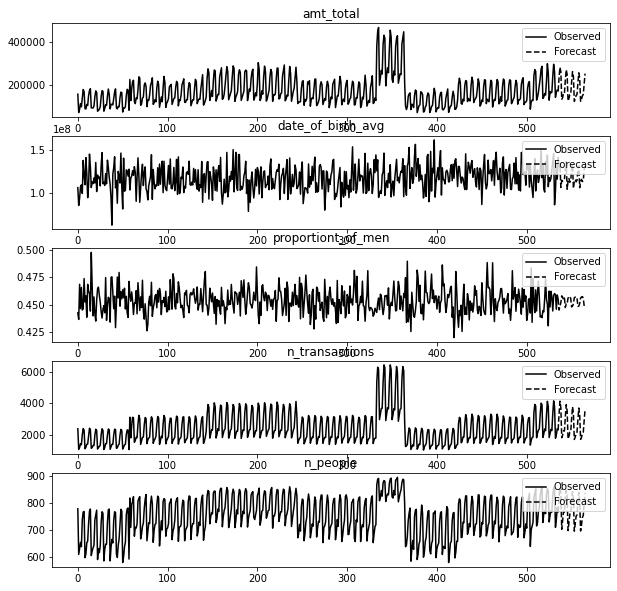

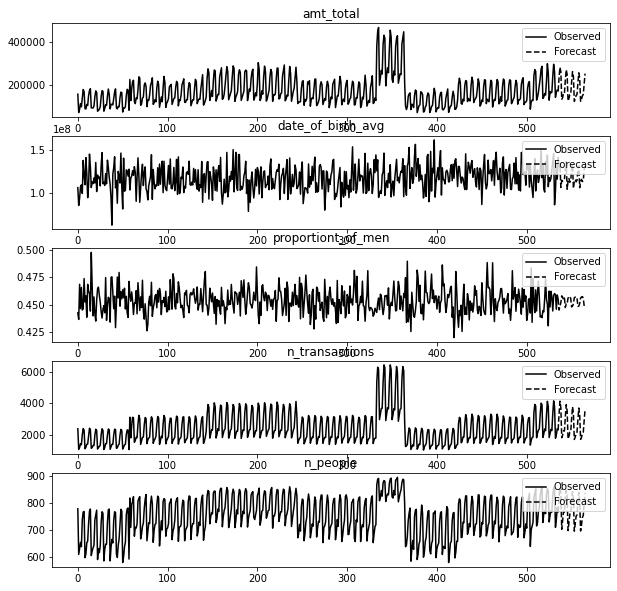

In [100]:
results.plot_forecast(forecast_days, plot_stderr=False) # I don't know why it plots twice. Must be a bug in statmodels

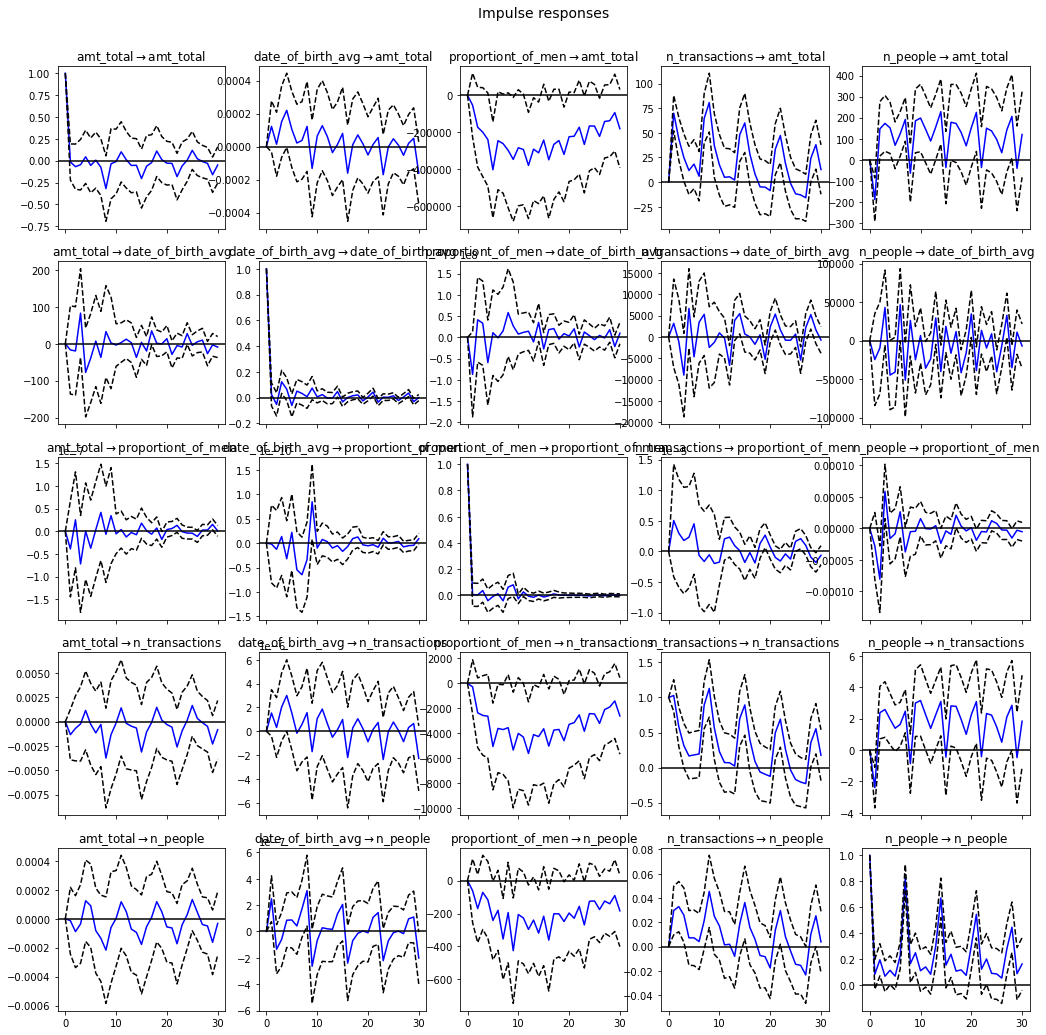

In [101]:
irf = results.irf(forecast_days) #Impulse Response Analysis
# plt.figure(figsize(20, 20))
irf.plot(orth=False, figsize=(15, 15)) # It reflects how one variable affects others. Closer it to 0 - less dependency
plt.savefig('irf.png')

In [102]:
fevd = results.fevd(forecast_days) # Forecast Error Variance Decomposition
fevd.summary()

FEVD for amt_total
      amt_total  date_of_birth_avg  proportiont_of_men  n_transactions  n_people
0      1.000000           0.000000            0.000000        0.000000  0.000000
1      0.916809           0.004435            0.000718        0.061579  0.016458
2      0.878473           0.003566            0.003495        0.093237  0.021229
3      0.854516           0.006200            0.006880        0.103017  0.029388
4      0.837807           0.012077            0.011976        0.103178  0.034963
5      0.818854           0.012873            0.028276        0.105121  0.034876
6      0.810345           0.012593            0.033284        0.105173  0.038605
7      0.792191           0.009464            0.028985        0.132415  0.036945
8      0.766981           0.009730            0.030939        0.159673  0.032677
9      0.757548           0.010561            0.034399        0.161932  0.035561
10     0.750260           0.010301            0.036980        0.161786  0.040673
11     0.

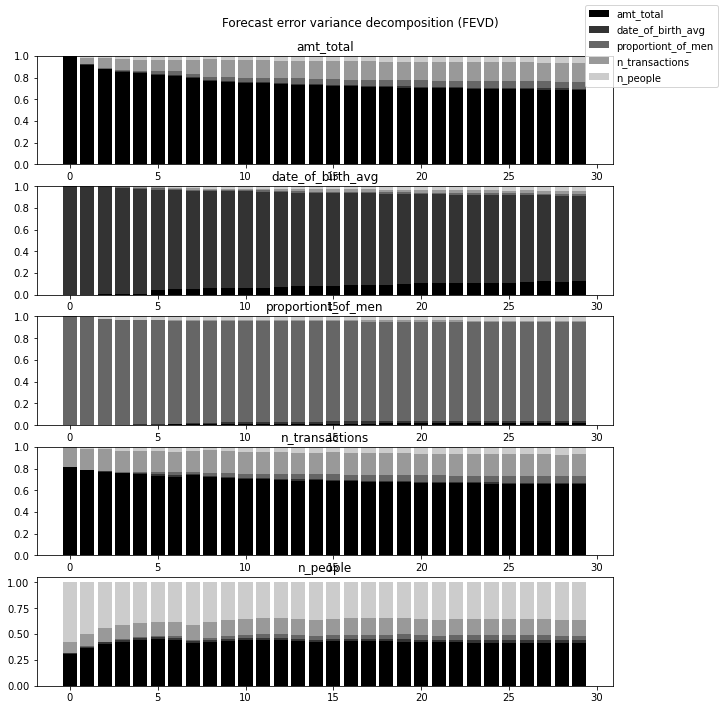

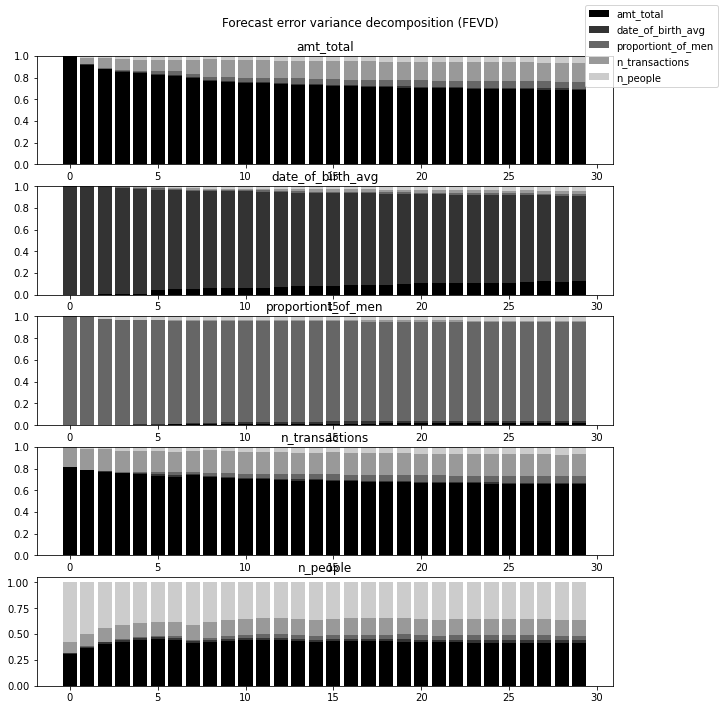

In [103]:
fevd.plot(forecast_days)

#### To calculate the quality of our model we will fit it with data without the last month we have, predict it and then compare predictions and real outcomes

In [104]:
forecast_days = 30
df_ = df_daily.drop(df_daily.tail(1).index)
# test_data.drop(test_data.tail(1).index)
train_data = df_[:-forecast_days]
test_data = df_[-forecast_days:]

In [105]:
model = VAR(data_to_predict)
# results = model.fit(forecast_days)
max_lags = max(n_lags.values())
# model.select_order(max_lags)
results = model.fit(maxlags=max_lags, ic='aic')
lag_order = results.k_ar
predictions = results.forecast(train_data.values[-lag_order:], forecast_days)

In [106]:
predictions = pd.DataFrame(predictions, columns=test_data.columns)

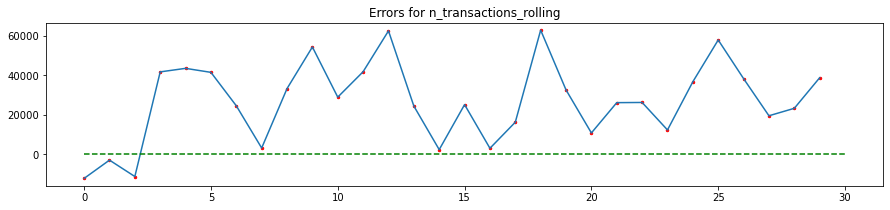

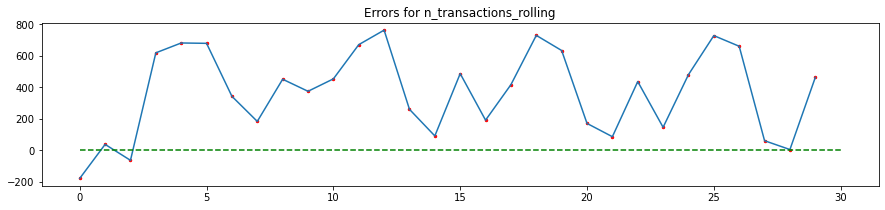

In [107]:
errors_amt = (test_data.reset_index().drop(columns=['day'])-predictions)['amt_total']
plt.figure(figsize(15, 3))
plt.plot(errors_amt) # our mistakes
plt.plot([0, 1, forecast_days], [0, 0, 0], 'g--')
plt.scatter(range(forecast_days), errors_amt, s=6, c='red')
plt.title('Errors for '+col)
plt.show()
errors_n_trans = (test_data.reset_index().drop(columns=['day'])-predictions)['n_transactions']
plt.figure(figsize(15, 3))
plt.plot(errors_n_trans) # our mistakes
plt.plot([0, 1, forecast_days], [0, 0, 0], 'g--')
plt.scatter(range(forecast_days), errors_n_trans, s=6, c='red')
plt.title('Errors for '+col)
plt.show()

In [108]:
MAE = (test_data.reset_index().drop(columns=['day'])-predictions).apply(abs)[['amt_total', 'n_transactions']]
MAE.rename(columns={'amt_total': 'amt_total_MAE', 'n_transactions': 'n_transactions_MAE'}, inplace=True)
MAE['amt_total_real'] = test_data.reset_index()['amt_total']
MAE['n_transactions_real'] = test_data.reset_index()['n_transactions']
MAE['amt_total_percent'] = MAE['amt_total_MAE']/MAE['amt_total_real']*100
MAE['n_transactions_percent'] = MAE['n_transactions_MAE']/MAE['n_transactions_real']*100
MAE['amt_total_cumsum'] = MAE['amt_total_MAE'].cumsum()
MAE['n_transactions_cumsum'] = MAE['n_transactions_MAE'].cumsum()

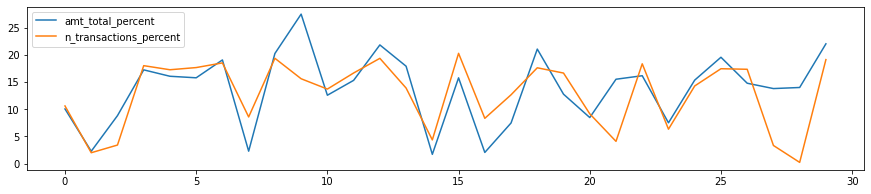

In [109]:
plt.plot(MAE['amt_total_percent'], label='amt_total_percent')
plt.plot(MAE['n_transactions_percent'], label='n_transactions_percent')
plt.legend()
plt.show()

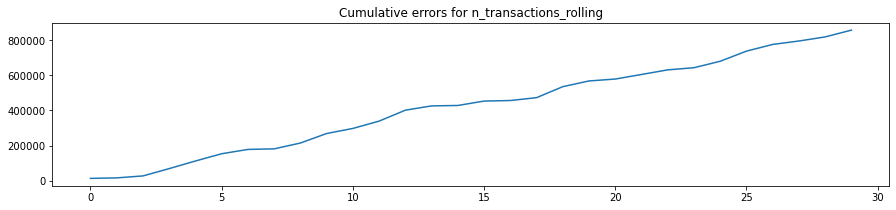

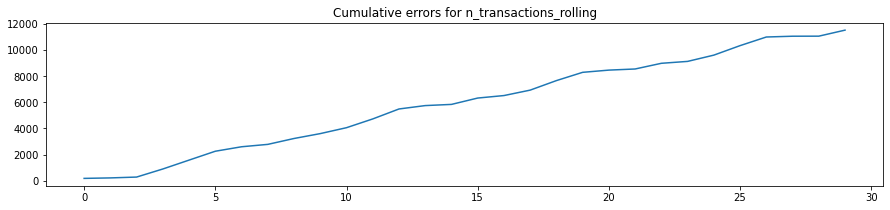

In [110]:
plt.figure(figsize(15, 3))
plt.plot(MAE['amt_total_cumsum']) # our mistakes
plt.title('Cumulative errors for '+col)
plt.show()
errors_n_trans = (test_data.reset_index().drop(columns=['day'])-predictions)['n_transactions']
plt.figure(figsize(15, 3))
plt.plot(MAE['n_transactions_cumsum']) # our mistakes
plt.title('Cumulative errors for '+col)
plt.show()

Error is growing linearly

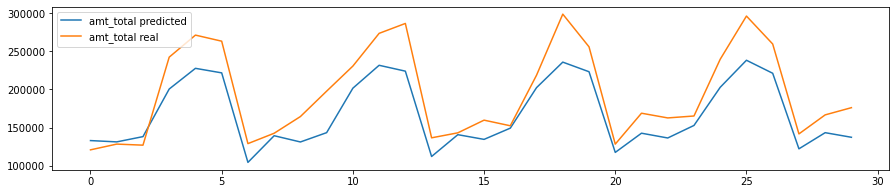

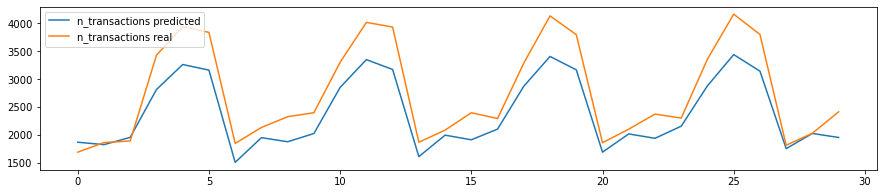

In [111]:
plt.figure(figsize(15, 3))
plt.plot(predictions['amt_total'], label='amt_total predicted')
plt.plot(test_data.reset_index()['amt_total'], label='amt_total real')
plt.legend()
plt.figure(figsize(15, 3))
plt.plot(predictions['n_transactions'], label='n_transactions predicted')
plt.plot(test_data.reset_index()['n_transactions'], label='n_transactions real')
plt.legend()
plt.show()

In [112]:
test_data

,amt_total,date_of_birth_avg,proportiont_of_men,n_transactions,n_people
day,,,,,
2020-05-21,120909.64,1.151092e+08,0.483412,1688,702
2020-05-22,128437.60,1.054432e+08,0.433871,1860,714
2020-05-23,127044.69,9.497417e+07,0.473545,1890,729
2020-05-24,242348.25,1.204569e+08,0.453644,3430,823
2020-05-25,271227.48,1.401187e+08,0.442669,3942,835
2020-05-26,263256.79,1.026657e+08,0.463402,3839,853
2020-05-27,129065.34,1.197692e+08,0.444204,1846,715
2020-05-28,142647.61,1.270734e+08,0.459878,2131,727
2020-05-29,164521.93,1.124982e+08,0.471398,2325,770


# The end of the report